# NOTES

# IMPORT

In [1]:
# Dataset Writer
import h5py
import os

# Dataset
import random
import progressbar
import pandas as pd
import numpy as np
from imutils import paths
from scipy.io import loadmat
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array


# Network
from keras.applications import VGG16
from keras.applications import imagenet_utils

Using TensorFlow backend.


# DATASET WRITER

In [2]:
class DatasetWriter:
    # constructor
    def __init__(self, dims, outputPath, dataKey='features', bufSize=1000):
        # store the buffer size and initialize buffer
        self.bufSize = bufSize
        self.buffer = {'data': [], 'labels': []}
        self.index = 0
        
        # check if outputPath exist
        if os.path.exists(outputPath):
            raise ValueError('The file "outputPath" already exist and cannnot be overwritten. Please supply anotther file path', outputPath)
        
        # open HDF5 database and create datasets
        self.database = h5py.File(outputPath, 'w')
        self.data = self.database.create_dataset(dataKey, dims, dtype='float')
        self.labels = self.database.create_dataset('labels', (dims[0],), dtype='int')
    
    # add data to database (in_memory operation)
    def add(self, data, labels):
        self.buffer['data'].extend(data)
        self.buffer['labels'].extend(labels)
        
        # flush buffer to disk
        if len(self.buffer['data']) >= self.bufSize:
            self.flush()
    
    # strore data to disk then reset buffer
    def flush(self):
        count = self.index + len(self.buffer['data'])
        self.data[self.index:count] = self.buffer['data']
        self.labels[self.index:count] = self.buffer['labels']
        self.index = count
        self.buffer = {'data': [], 'labels':[]}
    
    # store a classLabel
    def storeClassLabels(self, classLabels):
        dataType = h5py.special_dtype(vlen=str)
        labelSet = self.database.create_dataset('label_names', (len(classLabels),), dtype=dataType)
        labelSet[:] = classLabels
    
    # store remaining data and close the file
    def close(self):
        if len(self.buffer['data']) > 0:
            self.flush()
        
        self.database.close()

# STORE IMAGE DATASET TO HDF5 FORMAT

## Variables

In [3]:
dataset_dir = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/'
datasplitor = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/datasplit/datasplits.mat'
database_dir = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/HDF5/flower17.hdf5'
batch_size = 32
buffer_size = 1000


## Load images path

In [4]:
# image path
images_path = shuffle(list(paths.list_images(dataset_dir)))
images_path 

['C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Bluebell (77).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Colts Foot (48).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Dandelion (40).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Fritillary (72).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Fritillary (71).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Tulip (05).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/flower17/images/Buttercup (60).jpg',
 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep 

## Extract labels

In [5]:
labels = []
for (i, path) in enumerate(images_path):
    dir_structure = path.split('/')
    image_file = dir_structure[-1]
    label = image_file.split()[0]
    labels.append(label)
    
labels

['Bluebell',
 'Colts',
 'Dandelion',
 'Fritillary',
 'Fritillary',
 'Tulip',
 'Buttercup',
 'Crocus',
 'Cowslip',
 'Iris',
 'Tigerlily',
 'Fritillary',
 'Pansy',
 'Bluebell',
 'Sunflower',
 'Windflower',
 'Lily',
 'Dandelion',
 'Sunflower',
 'Bluebell',
 'Pansy',
 'Tigerlily',
 'Buttercup',
 'Snowdrop',
 'Tulip',
 'Dandelion',
 'Snowdrop',
 'Lily',
 'Fritillary',
 'Lily',
 'Bluebell',
 'Tulip',
 'Sunflower',
 'Dandelion',
 'Buttercup',
 'Bluebell',
 'Cowslip',
 'Tulip',
 'Dandelion',
 'Fritillary',
 'Daisy',
 'Colts',
 'Sunflower',
 'Snowdrop',
 'Buttercup',
 'Windflower',
 'Iris',
 'Fritillary',
 'Bluebell',
 'Dandelion',
 'Snowdrop',
 'Tulip',
 'Lily',
 'Daffodi',
 'Fritillary',
 'Fritillary',
 'Dandelion',
 'Cowslip',
 'Daffodi',
 'Daffodi',
 'Sunflower',
 'Windflower',
 'Lily',
 'Fritillary',
 'Buttercup',
 'Tulip',
 'Crocus',
 'Tulip',
 'Sunflower',
 'Tigerlily',
 'Cowslip',
 'Windflower',
 'Windflower',
 'Lily',
 'Buttercup',
 'Daisy',
 'Snowdrop',
 'Crocus',
 'Cowslip',
 'Sunflo

## Encode Labels

In [6]:
le = LabelEncoder()
labels = le.fit_transform(labels)

for label in labels:
    print(label)

0
2
7
8
8
15
1
4
3
9
14
8
11
0
13
16
10
7
13
0
11
14
1
12
15
7
12
10
8
10
0
15
13
7
1
0
3
15
7
8
6
2
13
12
1
16
9
8
0
7
12
15
10
5
8
8
7
3
5
5
13
16
10
8
1
15
4
15
13
14
3
16
16
10
1
6
12
4
3
13
5
10
3
12
11
9
14
7
9
14
7
9
4
0
4
9
5
0
13
1
2
12
5
0
16
13
6
2
14
15
0
12
4
3
14
15
0
6
15
1
0
4
3
5
7
14
0
8
2
9
12
8
4
5
16
9
11
1
2
16
9
10
10
2
14
15
0
13
2
2
16
2
16
12
8
14
3
2
14
15
1
2
13
5
5
7
13
13
4
7
0
1
6
9
11
2
3
4
12
9
2
7
12
5
12
7
8
10
2
1
4
4
10
12
8
5
5
0
14
12
11
4
1
8
14
11
4
8
0
14
1
7
10
10
8
14
2
4
11
11
4
0
1
7
5
16
16
0
3
0
2
13
9
7
5
4
16
5
13
12
15
11
3
12
11
16
14
10
15
10
13
16
8
6
10
8
12
4
14
11
2
0
3
8
8
8
0
6
4
6
11
10
0
13
0
7
10
5
6
1
9
1
7
1
9
6
4
9
9
16
12
6
9
1
15
6
14
14
5
5
16
15
2
16
5
9
3
1
10
16
16
2
4
7
1
1
2
15
16
6
11
12
13
15
3
8
15
4
8
8
15
5
11
10
10
1
7
1
4
12
11
0
14
16
11
0
7
12
6
10
8
5
10
3
6
7
15
1
16
16
11
16
2
4
16
8
0
7
5
6
4
9
11
15
0
9
4
5
0
3
5
15
9
14
15
6
4
3
12
3
14
14
8
12
14
9
7
3
3
4
8
13
5
12
9
2
1
9
16
13
14
9
10
8
4
4
16
1

In [7]:
le.classes_

array(['Bluebell', 'Buttercup', 'Colts', 'Cowslip', 'Crocus', 'Daffodi',
       'Daisy', 'Dandelion', 'Fritillary', 'Iris', 'Lily', 'Pansy',
       'Snowdrop', 'Sunflower', 'Tigerlily', 'Tulip', 'Windflower'],
      dtype='<U10')

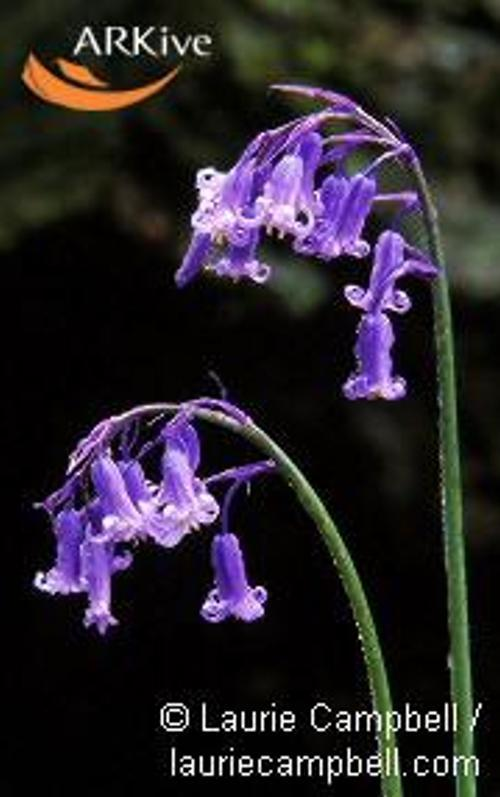

In [8]:
# image
images = []
for (i, path) in enumerate(images_path):
    image = load_img(path)
    images.append(image)
images[0]


## Splitting

In [9]:
datasplitor = loadmat(datasplitor)
datasplitor

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue May 23 14:09:12 2006',
 '__version__': '1.0',
 '__globals__': [],
 'trn1': array([[  24,   31,    8,   21,   25,   15,   27,   30,   39,   26,    2,
           29,   22,   16,   19,   36,   10,   33,    7,   35,   64,   71,
           48,   61,   65,   55,   67,   70,   79,   66,   42,   69,   62,
           56,   59,   76,   50,   73,   47,   75,  104,  111,   88,  101,
          105,   95,  107,  110,  119,  106,   82,  109,  102,   96,   99,
          116,   90,  113,   87,  115,  144,  151,  128,  141,  145,  135,
          147,  150,  159,  146,  122,  149,  142,  136,  139,  156,  130,
          153,  127,  155,  184,  191,  168,  181,  185,  175,  187,  190,
          199,  186,  162,  189,  182,  176,  179,  196,  170,  193,  167,
          195,  224,  231,  208,  221,  225,  215,  227,  230,  239,  226,
          202,  229,  222,  216,  219,  236,  210,  233,  207,  235,  264,
          271,  248,  261,  2

## Load VGG16 network

In [10]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [11]:
# Initialize dataset writer
dataset = DatasetWriter(dims=(len(images_path), 512 * 7 * 7), dataKey='features', outputPath=database_dir, bufSize=1000)
dataset.storeClassLabels(le.classes_)

In [12]:
# initialize progress bar
widgets = ['Extracting Features: ', progressbar.Percentage(), ' ', progressbar.Bar(), ' ', progressbar.ETA()]
progbar = progressbar.ProgressBar(maxval=len(images_path), widgets=widgets).start()

# loop over images_path in patches
for i in np.arange(0, len(images_path), batch_size):
    # extract the batch of images and labels
    batchPath = images_path[i:i + batch_size]
    batchLabels = labels[i:i + batch_size]
    batchImages = []
    
    # load images
    for (j, path) in enumerate(batchPath):
        # load images and convert to array
        image = load_img(path, target_size=(224, 224))
        image = img_to_array(image)
        
        # expand dims 
        image = np.expand_dims(image, axis=0)
        
        # preprocess image by substracting the mean RGB pixel intensity with imagenet_utils
        image  = imagenet_utils.preprocess_input(image)
        
        # append image to batch images container
        batchImages.append(image)
    
    # pass the images through the network and use the output as actual features
    batchImages = np.vstack(batchImages)
    features = model.predict(batchImages, batch_size=batch_size)
    
    # reshape features to get flatten image features
    features = features.reshape((features.shape[0], 512 * 7 * 7))
    
    # add the features and labels to HDF5 database
    dataset.add(features, batchLabels)
    progbar.update(i)

# close the dataset
dataset.close()
progbar.finish()

Extracting Features: 100% |#####################################| Time: 0:01:18


## Explore

In [21]:
db = h5py.File(database_dir, 'r')
label_names = np.array(db['label_names'])
label_names

array(['Bluebell', 'Buttercup', 'Colts', 'Cowslip', 'Crocus', 'Daffodi',
       'Daisy', 'Dandelion', 'Fritillary', 'Iris', 'Lily', 'Pansy',
       'Snowdrop', 'Sunflower', 'Tigerlily', 'Tulip', 'Windflower'],
      dtype=object)